In [1]:
import sys
sys.path.append("..")
from functions import RK4_step
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','ieee'])
plt.rcParams.update({'font.size': 12})

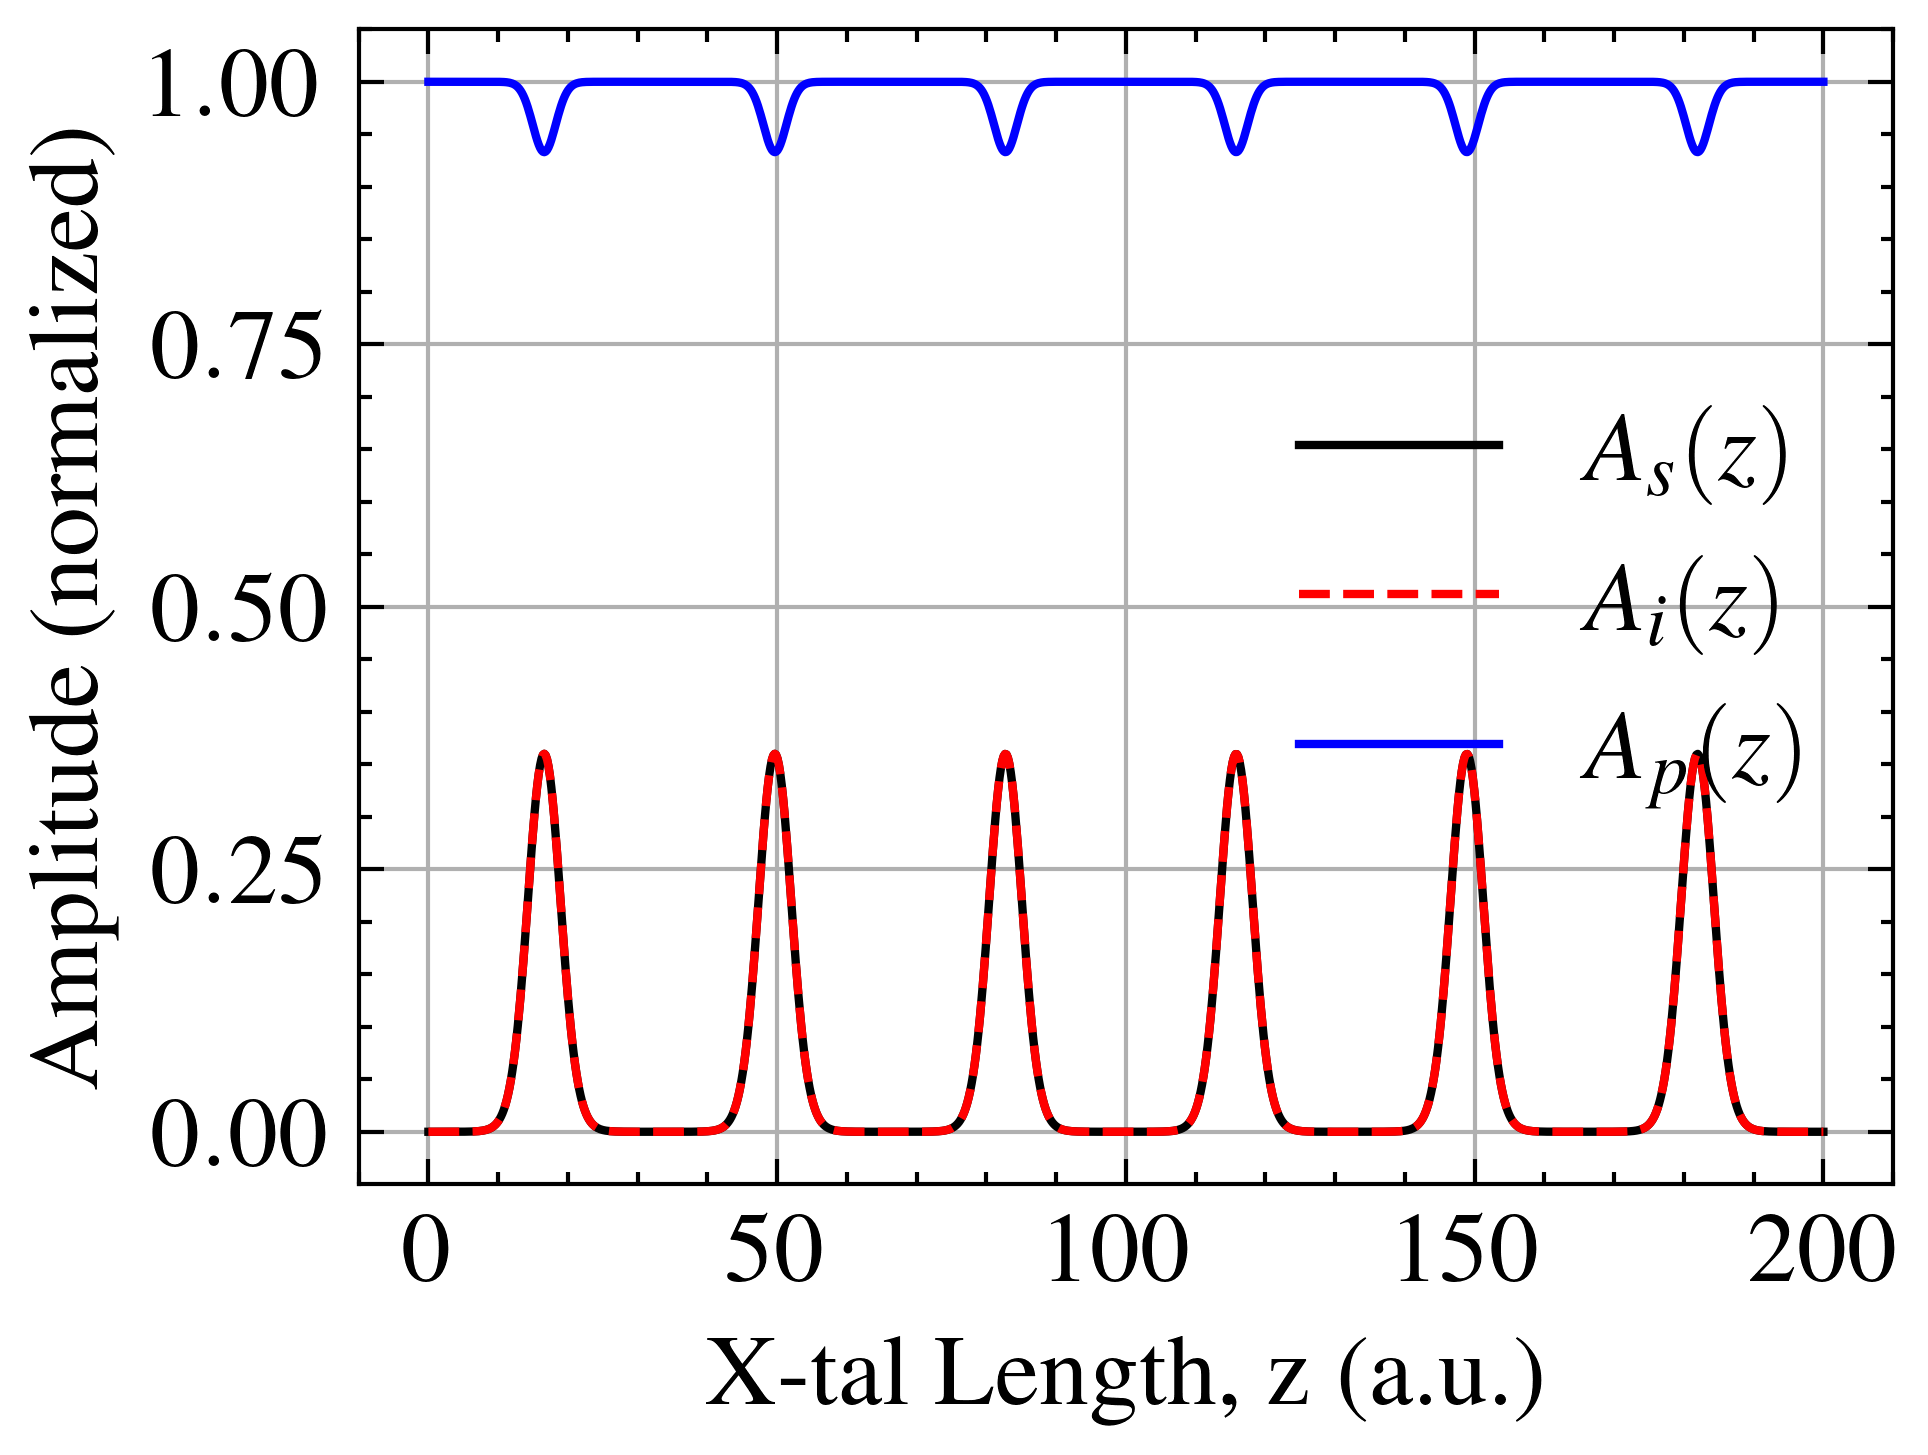

In [43]:
#args = (s,i,p)
def dpdz(z, *args):
    return 1j * args[0] * args[1] * np.exp(1j*del_k*z)
def dsdz(z, *args):
    return 1j * np.conj(args[1]) * args[2] * np.exp(-1j*del_k*z)
def didz(z, *args):
    return 1j * np.conj(args[0]) * args[2] * np.exp(-1j*del_k*z)

z = np.linspace(0, 200, 1000)
aS = np.zeros(len(z))
aI = np.zeros(len(z))
aP = np.zeros(len(z))
dz = z[1] - z[0]
del_k = 0.19
aS[0] = 0.00001
aI[0] = 0.00001
aP[0] = 1

for i in range(1, len(z)):
    aS[i], aI[i] , aP[i]= RK4_step([dsdz, didz, dpdz], z[i-1], dz, aS[i-1], aI[i-1], aP[i-1])


plt.plot(z, np.abs(aS), label='$A_s(z)$')
plt.plot(z, np.abs(aI), label='$A_i(z)$')
plt.plot(z, np.abs(aP), '-b',label='$A_p(z)$')
plt.xlabel('X-tal Length, z (a.u.)')
plt.ylabel('Amplitude (normalized)')
#plt.title('Runge-Kutta 4th Order Method')
plt.legend()
plt.grid()
plt.show()